In [1]:
import numpy as np
import pandas as pd
import os
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time
import pygmo as pg
import math

In [2]:
dataset = pd.read_csv("Griewank_dataset_data.csv")
Griewank_dataset = dataset["val"].tolist()

In [3]:
D = 500
f_bias = -180
lower_bound = -600
upper_bound = 600

In [4]:
def func(x):
    F1 = 0
    F2 = 1
    for i in range(D - 1):
        z = x[i] - Griewank_dataset[i]
        F1 += z ** 2 / 4000
        F2 += math.cos(z / math.sqrt(i + 1))
    func = F1 - F2 + 1 + f_bias
    return func

In [5]:
class GW:
    def __init__(self,xmin,xmax,D,f_bias):
        self.lower_bound = xmin
        self.upper_bound = xmax
        self.dimension = D
        self.fitness_per_eval = []
        self.glob_opt = f_bias

    def fitness(self, x):
        #result = abs(func(x)-f_bias)
        result = func(x)
        return [result]

    def get_bounds(self):
        x_min = self.lower_bound * np.ones(self.dimension)
        x_max = self.upper_bound * np.ones(self.dimension)
        return x_min, x_max

In [6]:
def compute(func):
    global curve
    global start_time
    global end_time
    start_time = time.time()
    algo = pg.algorithm(pg.simulated_annealing(Ts=20., Tf=1e-5))
    algo.set_verbosity(1)
    popsize = 1
    prob = pg.problem(GW(lower_bound,upper_bound,D,f_bias))
    pop = pg.population(prob, popsize)
    extract_algo = algo.extract(pg.simulated_annealing)
    pop = algo.evolve(pop)
    end_time = time.time()
    
    log = extract_algo.get_log()
    curve = [x[2] for x in log]
    #niter = log[-1][0]
    niter = pop.problem.get_fevals()
    print("Best position: ", pop.champion_x)
    print("Best Fitness",pop.champion_f[0])

In [7]:
compute(func)

Best position:  [ 546.43431324 -322.70190963  128.2132059   -16.89350941  469.53797014
  329.85910299  -52.23216206 -577.93236983  404.43158141  -66.43504931
  138.48010874  350.34597649  506.16013089  285.85595289 -364.36666901
 -113.14695841  522.57962327  473.89516159 -107.66931792  472.37535902
 -530.50480669 -176.51618802  375.80603965 -557.84952961 -433.36955308
 -356.71950505 -361.47090564  124.52632605 -273.33989883 -361.37795282
 -581.66151562  296.09395547  -65.95064966  518.01945116  -40.85444441
  -97.63182102  415.50206383   30.26365908 -356.88493447  206.57123992
  405.79184789 -576.33983232  217.51996654 -144.58774357  398.0766697
    3.34945863  251.33061077  -85.37199004 -234.35491811 -372.45530277
 -367.91468614  218.48071698 -236.62404219   49.92856955 -418.99048233
  237.49541063 -145.91150535  431.94750368  424.3839846   112.20495774
   -4.11231763  479.77632405  386.02522325  125.18851734  381.60017971
  192.24201348 -189.69161713 -252.39215502 -190.61343891   40.

In [8]:
comp_time = end_time-start_time
comp_time

124.91929650306702

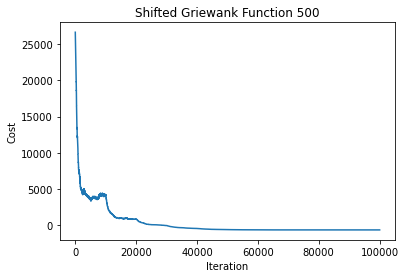

In [9]:
plt.plot(curve)
plt.title("Shifted Griewank Function 500")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()